In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#Function used to convert numbers to right format for python
def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [3]:
#Import Data
bkg = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/bkg.CSV")), delimiter =";")
std_ex_0degree_stretched = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std_ex_0degree_stretched.CSV")), delimiter =";")
std_ex_90degree = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std_ex_90degree.CSV")), delimiter =";")
std_ext_0deg = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std_ext_0deg.CSV")), delimiter =";")
std2_0degree_stretched2x = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std2_0degree_stretched2x.CSV")), delimiter =";")
stdd2_90degree_2xstretched = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/stdd2_90degree_2xstretched.CSV")), delimiter =";")

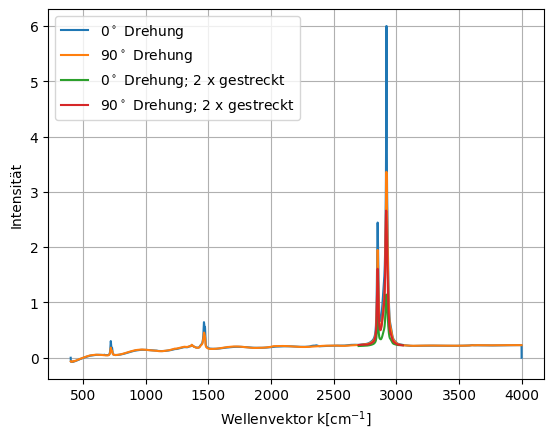

In [13]:
#First Look on the Data

plt.plot(std_ex_90degree[:,0],(std_ex_90degree[:,1]) ,label= r"0$^\circ$ Drehung")
plt.plot(std_ext_0deg[:,0],(std_ext_0deg[:,1]) ,label=r"$90^\circ$ Drehung")
plt.plot(std2_0degree_stretched2x[:,0],(std2_0degree_stretched2x[:,1]) ,label=r"0$^\circ$ Drehung; 2 x gestreckt")
plt.plot(stdd2_90degree_2xstretched[:,0],(stdd2_90degree_2xstretched[:,1]) ,label=r"$90^\circ$ Drehung; 2 x gestreckt")

#plt.xlim((2830,2950))
plt.grid(True)
plt.xlabel(r"Wellenvektor k$ [\mathrm{cm}^{-1}]$")
plt.ylabel("Intensität")
plt.legend(loc = 0)
plt.savefig("plots/Dichro_all_zoom.pdf")#

Spitzenwert1 = 2850.89$\mathrm{cm}^{-1}$
Spitzenwert2 = 2851.1$\mathrm{cm}^{-1}$
$\sigma_1 =$ 5.69
$\sigma_1 =$ 5.53
D = 3.68e-05 ± 0.0006956


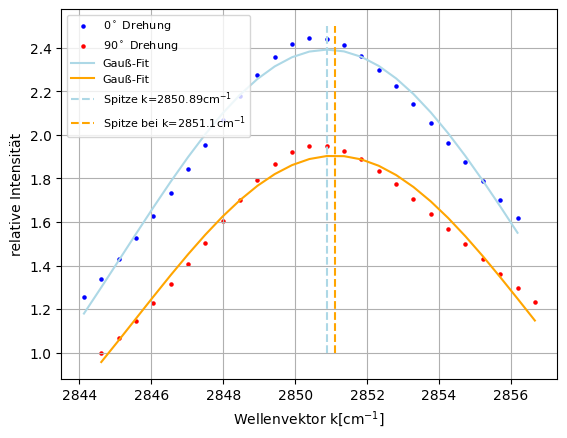

In [11]:
#Import Data 
xdata = np.asarray(std_ex_90degree[5070:5096,0])
ydata = np.asarray(std_ex_90degree[5070:5096,1])
xdata1 = np.asarray(std_ext_0deg[5070:5096,0])
ydata1 = np.asarray(std_ext_0deg[5070:5096,1])

#estimate values for the gaussian fit
n = len(xdata)    
mean = 2850                                  
sigma = sum(ydata*(xdata-mean)**2)/n

#define gaussian
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

#fit gaussian
popt,pcov = curve_fit(gaus,xdata,ydata,p0=[1,mean,sigma])
popt1,pcov1 = curve_fit(gaus,xdata1,ydata1, p0=[1,mean,sigma])

halfsigma = popt[2]/2
halfsigma1 = popt1[2]/2

plt.scatter(xdata, ydata, label= r"0$^\circ$ Drehung",s=5,c="blue")
plt.scatter(xdata1, ydata1, label= r"90$^\circ$ Drehung",s=5,c="red")
plt.plot(xdata, gaus(xdata,*popt), '-', label='Gauß-Fit',c="lightblue")
plt.plot(xdata1, gaus(xdata1,*popt1), '-', label='Gauß-Fit',c="orange")
plt.plot([popt[1],popt[1]],[1,2.5],"--",c="lightblue",label="Spitze k="+str(np.round(popt[1],2))+r"$\mathrm{cm}^{-1}$")
plt.plot([popt1[1],popt1[1]],[1,2.5],"--",c="orange",label="Spitze bei k="+str(np.round(popt1[1],2))+r"$\mathrm{cm}^{-1}$")

plt.grid(True)
plt.xlabel(r"Wellenvektor k$ [\mathrm{cm}^{-1}]$")
plt.ylabel("relative Intensität")
plt.legend(loc = "upper left", prop={'size': 8})
plt.savefig("plots/dichron0rotpeaks.pdf")

#calculate dichroism and error
D = (popt1[1]-popt[1])/(popt1[1]+popt[1])
df = np.sqrt((halfsigma1*((2*popt[1])/((popt[1]+popt1[1])**2)))**2+(halfsigma*-((2*popt1[1])/((popt[1]+popt1[1])**2)))**2)

print("Spitzenwert1 = "+str(np.round(popt[1],2))+r"$\mathrm{cm}^{-1}$")
print("Spitzenwert2 = "+str(np.round(popt1[1],2))+r"$\mathrm{cm}^{-1}$")
print(r"$\sigma_1 =$",str(np.round(np.fabs(popt[2]),2)))
print(r"$\sigma_1 =$",str(np.round(np.fabs(popt1[2]),2)))
print("D = "+str(np.round(D,7))+r" ± "+str(np.round(df,7)))

Spitzenwert1 = 2851.11$\mathrm{cm}^{-1}$
Spitzenwert2 = 2850.73$\mathrm{cm}^{-1}$
$\sigma_1 =$ 7.26
$\sigma_1 =$ 6.05
D = 6.64e-05 ± 0.0008291


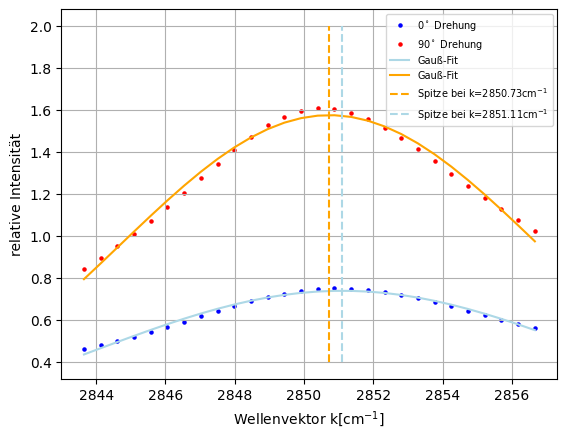

In [10]:
#import dara
x1 = np.asarray(std2_0degree_stretched2x[300:328,0])
y1 = np.asarray(std2_0degree_stretched2x[300:328,1])
x2 = np.asarray(stdd2_90degree_2xstretched[300:328,0])
y2 = np.asarray(stdd2_90degree_2xstretched[300:328,1])

#estimate values for the gaussian fit
n= len(x1) 
mean = 2850                     
sigma= sum(ydata*(xdata-mean)**2)/n

#fit gaussian
popt2,pcov2 = curve_fit(gaus,x1,y1,p0=[1,mean,sigma])
popt3,pcov3 = curve_fit(gaus,x2,y2,p0=[1,mean,sigma])

halfsigma2 = popt2[2]/2
halfsigma3 = popt3[2]/2


plt.scatter(x1, y1, s=5,c="blue",label= r"0$^\circ$ Drehung")
plt.scatter(x2, y2, s=5,c="red",label= r"90$^\circ$ Drehung")

plt.plot(x1, gaus(x1,*popt2), '-',c="lightblue",label='Gauß-Fit')
plt.plot(x2, gaus(x1,*popt3), '-',c="orange",label='Gauß-Fit')

plt.plot([popt3[1],popt3[1]],[0.4,2],"--",c="orange",label="Spitze bei k="+str(np.round(popt3[1],2))+r"$\mathrm{cm}^{-1}$")
plt.plot([popt2[1],popt2[1]],[0.4,2],"--",c="lightblue",label="Spitze bei k="+str(np.round(popt2[1],2))+r"$\mathrm{cm}^{-1}$")


plt.grid(True)
plt.xlabel(r"Wellenvektor k$ [\mathrm{cm}^{-1}]$")
plt.ylabel("relative Intensität")
plt.legend(loc = 1, prop={'size': 7})
plt.savefig("plots/dichronstretched.pdf")

#calculate dichroism and error
D = (popt2[1]-popt3[1])/(popt3[1]+popt2[1])
df = np.sqrt((halfsigma2*((2*popt3[1])/((popt2[1]+popt3[1])**2)))**2+(halfsigma3*-((2*popt2[1])/((popt2[1]+popt3[1])**2)))**2)


print("Spitzenwert1 = "+str(np.round(popt2[1],2))+r"$\mathrm{cm}^{-1}$")
print("Spitzenwert2 = "+str(np.round(popt3[1],2))+r"$\mathrm{cm}^{-1}$")
print(r"$\sigma_1 =$",str(np.round(np.fabs(popt2[2]),2)))
print(r"$\sigma_1 =$",str(np.round(np.fabs(popt3[2]),2)))
print("D = "+str(np.round(D,7))+r" ± "+str(np.round(df,7)))

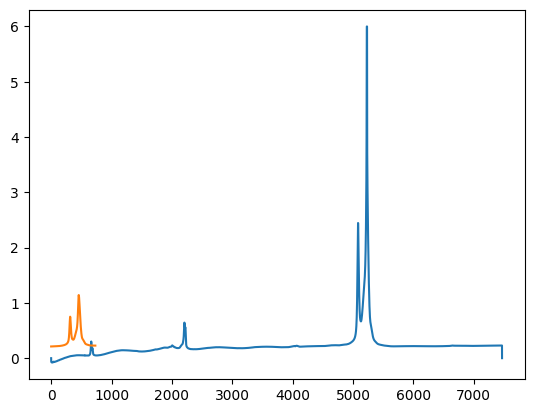

In [9]:
#This block is used to find the right indices of the array cause index /= wave-vector
#plt.axis([300,330,0,3])

xax = np.arange(0,len(std_ex_90degree))
xax2 = np.arange(0,len(std2_0degree_stretched2x))

plt.plot(xax, std_ex_90degree[:,1])
plt.plot(xax2, std2_0degree_stretched2x[:,1])